<a href="https://colab.research.google.com/github/efrat-dev/insider-threat-detector/blob/main/generate_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

def generate_security_dataset(rows=5000):
    data = []
    start_date = datetime(2023, 1, 1)

    # # Define countries by categories
    regular_countries = ['Israel', 'USA', 'UK', 'France', 'Germany', 'Spain', 'Italy', 'Japan']
    hostile_countries = ['Iran', 'Syria', 'Lebanon', 'Russia', 'Ukraine']

    # Employee IDs
    employee_ids = range(1, 201)  # 200 עובדים

    for _ in range(rows):
        # Choose whether the employee will be suspicious (10% chance)
        is_suspicious = random.random() < 0.10

        # Select suspicion level (for suspicious employees)
        if is_suspicious:
            suspicion_level = random.choices(['high', 'medium', 'low'], weights=[0.1, 0.4, 0.5])[0]

        # Generate baseline data
        emp_id = random.choice(employee_ids)
        date = start_date + timedelta(days=random.randint(0, 364))

        # Define features based on suspicion level
        if is_suspicious:
            if suspicion_level == 'high':
                print_volume = random.randint(400, 600)
                odd_hours_volume = random.randint(100, 200)
                presence_hours = round(random.uniform(10.5, 12), 1)
                country = random.choice(hostile_countries)
                foreign_travel = random.randint(1, 3)
                hostile_travel = random.randint(1, 2)
            elif suspicion_level == 'medium':
                print_volume = random.randint(150, 250)
                odd_hours_volume = random.randint(30, 70)
                presence_hours = round(random.uniform(9.5, 10.5), 1)
                country = random.choice(hostile_countries)
                foreign_travel = random.randint(1, 2)
                hostile_travel = random.randint(0, 1)
            else:  # low
                print_volume = random.randint(110, 150)
                odd_hours_volume = random.randint(10, 30)
                presence_hours = round(random.uniform(8.8, 9.5), 1)
                country = random.choice(hostile_countries + regular_countries)
                foreign_travel = random.randint(0, 1)
                hostile_travel = 0 if country in regular_countries else random.randint(0, 1)
        else:
            print_volume = random.randint(70, 110)
            odd_hours_volume = random.randint(0, 10)
            presence_hours = round(random.uniform(8.0, 9.0), 1)
            country = random.choice(regular_countries)
            foreign_travel = random.randint(0, 1)
            hostile_travel = 0

        # Calculate number of prints (approx. 2MB per print)
        print_count = int(print_volume / 2)
        odd_hours_count = int(odd_hours_volume / 2)

        # Define the remaining features
        foreign_citizenship = 'Yes' if (country in hostile_countries or random.random() < 0.1) else 'No'
        criminal_record = 'Yes' if (is_suspicious and random.random() < 0.2) else 'No'
        medical_issues = 'Yes' if random.random() < 0.15 else 'No'
        security_violations = 'Yes' if (is_suspicious and random.random() < 0.3) else 'No'
        disciplinary_actions = 'Yes' if (is_suspicious and random.random() < 0.25) else 'No'
        odd_hours_entry = 'Yes' if odd_hours_volume > 0 else 'No'

        data.append({
            'Employee_ID': emp_id,
            'Date': date.strftime('%Y-%m-%d'),
            'Print_Count': print_count,
            'Print_Volume_MB': print_volume,
            'Odd_Hours_Print_Count': odd_hours_count,
            'Odd_Hours_Print_Volume_MB': odd_hours_volume,
            'Total_Presence_Hours': presence_hours,
            'Odd_Hours_Entry': odd_hours_entry,
            'Foreign_Travel_Count': foreign_travel,
            'Travel_To_Hostile_Countries_Count': hostile_travel,
            'Country_Of_Origin': country,
            'Foreign_Citizenship': foreign_citizenship,
            'Criminal_Record': criminal_record,
            'Medical_Issues': medical_issues,
            'Security_Violations': security_violations,
            'Disciplinary_Actions': disciplinary_actions,
            'Suspicious_Flag': 1 if is_suspicious else 0
        })

    df = pd.DataFrame(data)
    return df

# Create the dataset
df = generate_security_dataset(5000)

# Sort by date and employee ID
df = df.sort_values(['Date', 'Employee_ID'])

# Save the file
df.to_csv('employee_security_analysis.csv', index=False)

# Display basic statistics
print("Total Records:", len(df))
print("\nSuspicious Records:", len(df[df['Suspicious_Flag'] == 1]))
print("Normal Records:", len(df[df['Suspicious_Flag'] == 0]))
print("\nSample of the data:")
print(df.head())

Total Records: 5000

Suspicious Records: 484
Normal Records: 4516

Sample of the data:
      Employee_ID        Date  Print_Count  Print_Volume_MB  \
4283            5  2023-01-01           44               88   
2261           22  2023-01-01           41               83   
4082           61  2023-01-01           54              109   
4633           63  2023-01-01           41               83   
891            66  2023-01-01           46               93   

      Odd_Hours_Print_Count  Odd_Hours_Print_Volume_MB  Total_Presence_Hours  \
4283                      5                         10                   8.4   
2261                      3                          6                   8.8   
4082                      3                          7                   8.3   
4633                      3                          6                   8.1   
891                       4                          9                   8.7   

     Odd_Hours_Entry  Foreign_Travel_Count  Travel_To

=== Basic Statistics ===
Total Records: 5000
Suspicious Records: 498 (9.96%)
Normal Records: 4502 (90.04%)


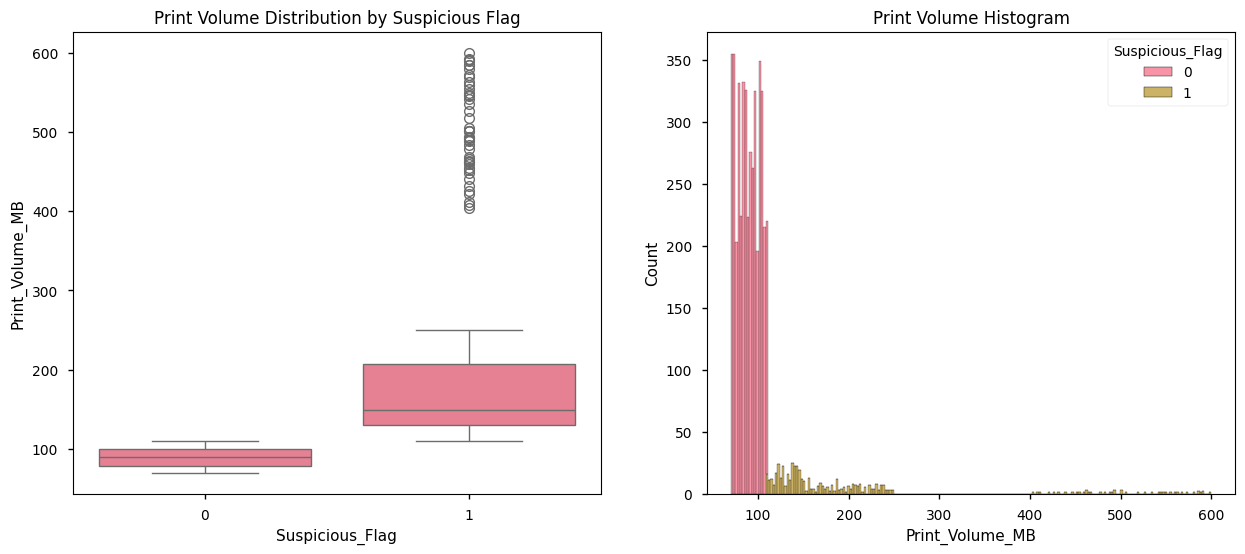

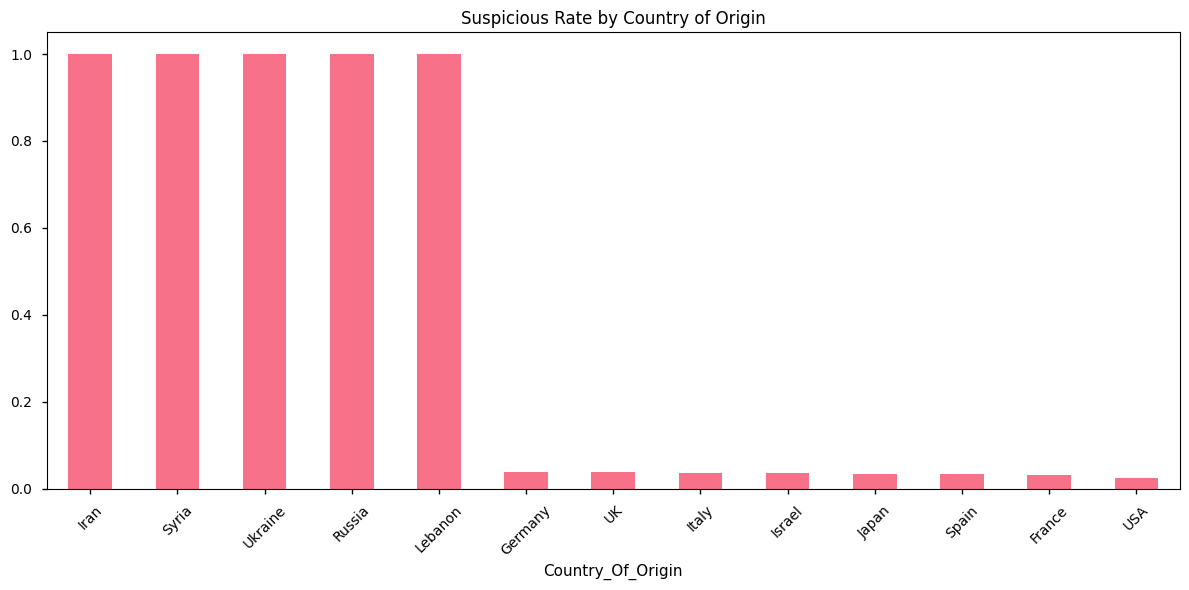

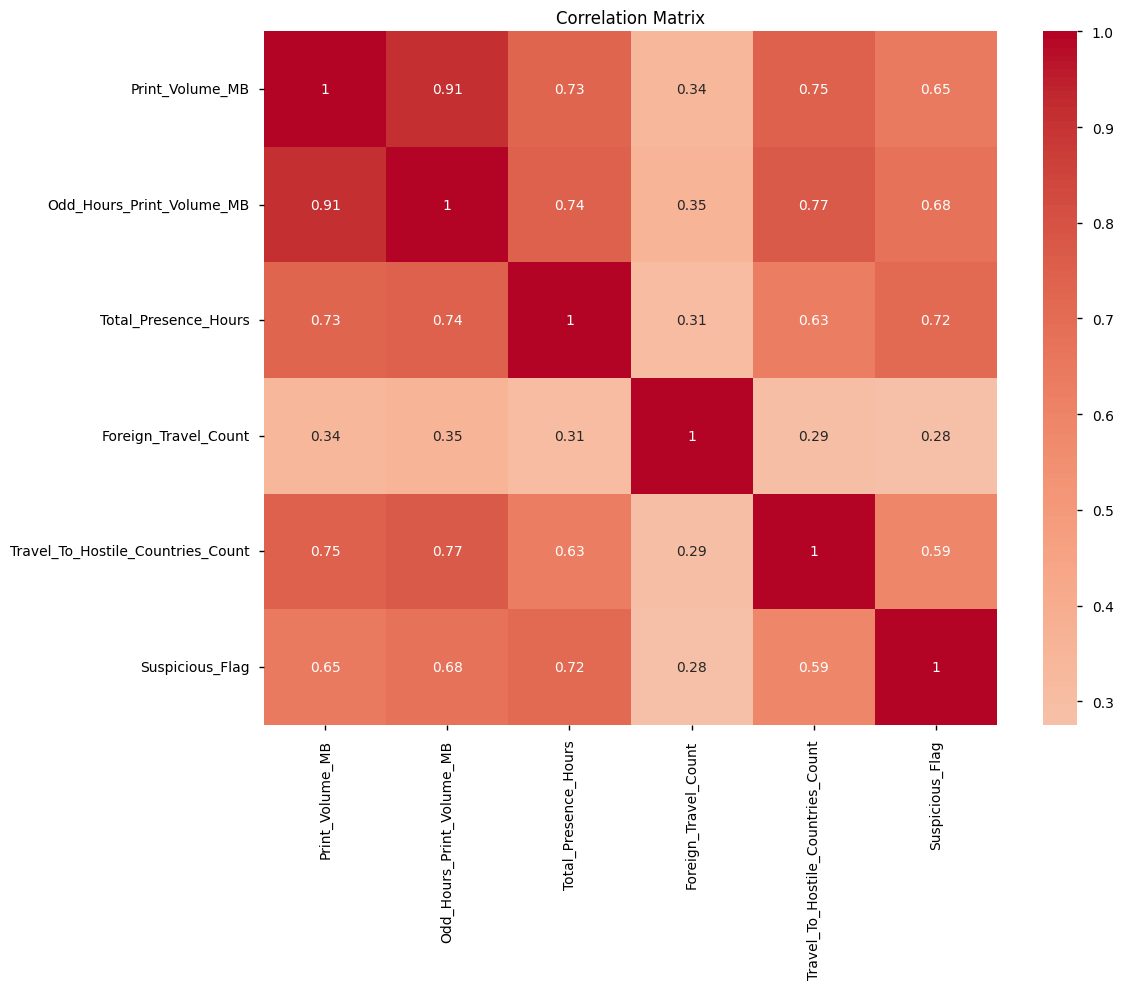


=== Foreign_Citizenship Analysis ===
Suspicious Rate when Foreign_Citizenship = Yes: 46.23%
Suspicious Rate when Foreign_Citizenship = No: 3.36%

=== Criminal_Record Analysis ===
Suspicious Rate when Criminal_Record = Yes: 100.00%
Suspicious Rate when Criminal_Record = No: 8.08%

=== Medical_Issues Analysis ===
Suspicious Rate when Medical_Issues = Yes: 10.90%
Suspicious Rate when Medical_Issues = No: 9.79%

=== Security_Violations Analysis ===
Suspicious Rate when Security_Violations = Yes: 100.00%
Suspicious Rate when Security_Violations = No: 7.33%

=== Disciplinary_Actions Analysis ===
Suspicious Rate when Disciplinary_Actions = Yes: 100.00%
Suspicious Rate when Disciplinary_Actions = No: 7.75%


<Figure size 1500x600 with 0 Axes>

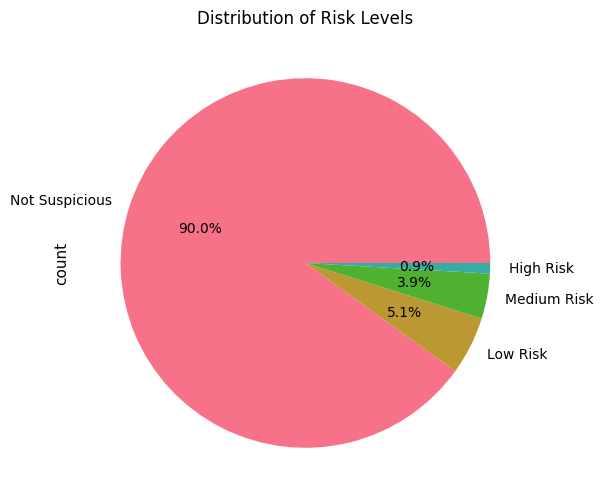

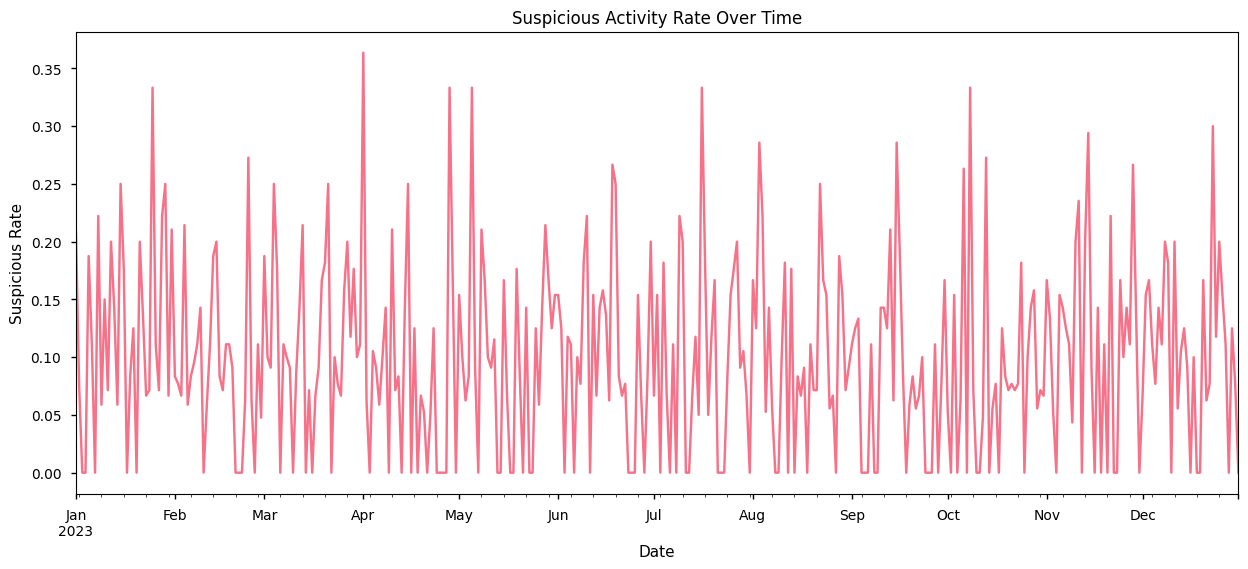


=== Detailed Statistics by Risk Level ===
               Print_Volume_MB        Odd_Hours_Print_Volume_MB  \
                          mean    std                      mean   
Risk_Level                                                        
High Risk               504.43  57.18                    145.91   
Low Risk                130.59  11.62                     19.89   
Medium Risk             196.50  29.09                     48.74   
Not Suspicious           89.75  11.89                      5.02   

               Total_Presence_Hours Foreign_Travel_Count  \
                               mean                 mean   
Risk_Level                                                 
High Risk                     11.27                 1.87   
Low Risk                       9.20                 0.50   
Medium Risk                   10.02                 1.48   
Not Suspicious                 8.51                 0.50   

               Travel_To_Hostile_Countries_Count  
               

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading the file
df = pd.read_csv('employee_security_analysis.csv')

# Defining visual style
plt.style.use('seaborn-v0_8-notebook')
sns.set_palette("husl")

# Function to display graphs
def plot_figure(fig):
    plt.figure(figsize=(12, 6))
    plt.tight_layout()
    return fig

# 1. Basic statistics
print("=== Basic Statistics ===")
print(f"Total Records: {len(df)}")
print(f"Suspicious Records: {len(df[df['Suspicious_Flag'] == 1])} ({(len(df[df['Suspicious_Flag'] == 1])/len(df)*100):.2f}%)")
print(f"Normal Records: {len(df[df['Suspicious_Flag'] == 0])} ({(len(df[df['Suspicious_Flag'] == 0])/len(df)*100):.2f}%)")

# 2. Print volume analysis
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Suspicious_Flag', y='Print_Volume_MB', data=df)
plt.title('Print Volume Distribution by Suspicious Flag')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Print_Volume_MB', hue='Suspicious_Flag', multiple="stack")
plt.title('Print Volume Histogram')
plt.show()

# 3. Country of origin analysis
plt.figure(figsize=(12, 6))
suspicious_by_country = df.groupby('Country_Of_Origin')['Suspicious_Flag'].mean().sort_values(ascending=False)
suspicious_by_country.plot(kind='bar')
plt.title('Suspicious Rate by Country of Origin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(12, 10))
numeric_cols = ['Print_Volume_MB', 'Odd_Hours_Print_Volume_MB', 'Total_Presence_Hours',
                'Foreign_Travel_Count', 'Travel_To_Hostile_Countries_Count', 'Suspicious_Flag']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 5. Binary feature analysis
binary_cols = ['Foreign_Citizenship', 'Criminal_Record', 'Medical_Issues',
               'Security_Violations', 'Disciplinary_Actions']

plt.figure(figsize=(15, 6))
for i, col in enumerate(binary_cols, 1):
    suspicious_rate = df[df[col] == 'Yes']['Suspicious_Flag'].mean()
    normal_rate = df[df[col] == 'No']['Suspicious_Flag'].mean()
    print(f"\n=== {col} Analysis ===")
    print(f"Suspicious Rate when {col} = Yes: {suspicious_rate:.2%}")
    print(f"Suspicious Rate when {col} = No: {normal_rate:.2%}")

# 6. Suspicion level analysis
def determine_suspicion_level(row):
    if row['Suspicious_Flag'] == 0:
        return 'Not Suspicious'
    elif row['Print_Volume_MB'] >= 400:
        return 'High Risk'
    elif row['Print_Volume_MB'] >= 150:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['Risk_Level'] = df.apply(determine_suspicion_level, axis=1)

plt.figure(figsize=(10, 6))
risk_distribution = df['Risk_Level'].value_counts()
risk_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Risk Levels')
plt.show()

# 7. Time pattern analysis
df['Date'] = pd.to_datetime(df['Date'])
suspicious_over_time = df.groupby('Date')['Suspicious_Flag'].mean()

plt.figure(figsize=(15, 6))
suspicious_over_time.plot()
plt.title('Suspicious Activity Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Suspicious Rate')
plt.show()

# 8. Detailed statistics by risk level
print("\n=== Detailed Statistics by Risk Level ===")
risk_stats = df.groupby('Risk_Level').agg({
    'Print_Volume_MB': ['mean', 'std'],
    'Odd_Hours_Print_Volume_MB': 'mean',
    'Total_Presence_Hours': 'mean',
    'Foreign_Travel_Count': 'mean',
    'Travel_To_Hostile_Countries_Count': 'mean'
}).round(2)
print(risk_stats)

# 9. Anomaly pattern detection
print("\n=== Anomaly Patterns ===")
high_print_normal = df[(df['Print_Volume_MB'] > df['Print_Volume_MB'].quantile(0.95)) &
                      (df['Suspicious_Flag'] == 0)]
print(f"High Print Volume but Not Suspicious: {len(high_print_normal)} cases")

low_print_suspicious = df[(df['Print_Volume_MB'] < df['Print_Volume_MB'].quantile(0.25)) &
                         (df['Suspicious_Flag'] == 1)]
print(f"Low Print Volume but Suspicious: {len(low_print_suspicious)} cases")